# Introduction

Reva Fahrian Natamenggala / PYTN-KS20-017

# Import

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()
rand = 9999

# Data Loading

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
print('data read into a pandas dataframe')

data read into a pandas dataframe


In [3]:
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


# Data Cleaning

In [4]:
df.shape

(84548, 22)

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

In [7]:
sum(df.duplicated())

765

In [8]:
df = df.drop_duplicates(df.columns, keep='last')

In [9]:
df.replace({"-":0},inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19908\1434520589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({"-":0},inplace=True)


In [10]:
df.replace(' ',np.nan, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19908\1266622267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(' ',np.nan, inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         83783 non-null  int64  
 1   NEIGHBORHOOD                    83783 non-null  object 
 2   BUILDING CLASS CATEGORY         83783 non-null  object 
 3   TAX CLASS AT PRESENT            83045 non-null  object 
 4   BLOCK                           83783 non-null  int64  
 5   LOT                             83783 non-null  int64  
 6   EASE-MENT                       0 non-null      float64
 7   BUILDING CLASS AT PRESENT       83045 non-null  object 
 8   ADDRESS                         83783 non-null  object 
 9   APARTMENT NUMBER                18849 non-null  object 
 10  ZIP CODE                        83783 non-null  int64  
 11  RESIDENTIAL UNITS               83783 non-null  int64  
 12  COMMERCIAL UNITS                

In [12]:
df.drop('EASE-MENT', axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19908\2883773547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('EASE-MENT', axis=1, inplace=True)


# Data Preprocessing

In [13]:
for col in df.columns:
    print(col, df[col].nunique())

BOROUGH 5
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 10
BLOCK 11566
LOT 2627
BUILDING CLASS AT PRESENT 166
ADDRESS 67563
APARTMENT NUMBER 3988
ZIP CODE 186
RESIDENTIAL UNITS 176
COMMERCIAL UNITS 55
TOTAL UNITS 192
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
YEAR BUILT 158
TAX CLASS AT TIME OF SALE 4
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [14]:
for col in ['BOROUGH', 'TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE']:
    print(df[col].value_counts())

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64
1     38329
2     30721
4      5960
2A     2492
2C     1907
1A     1440
1B     1208
2B      799
1C      186
3         3
Name: TAX CLASS AT PRESENT, dtype: int64
1    41199
2    36476
4     6105
3        3
Name: TAX CLASS AT TIME OF SALE, dtype: int64


In [15]:
categoricals = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT']

for col in categoricals:
    df[col] = df[col].astype('category')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19908\1851880000.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19908\1851880000.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19908\1851880000.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [16]:
floats = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']

for col in floats:
    df[col]=pd.to_numeric(df[col], errors='coerce')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19908\45263309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=pd.to_numeric(df[col], errors='coerce')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         83783 non-null  category
 1   NEIGHBORHOOD                    83783 non-null  category
 2   BUILDING CLASS CATEGORY         83783 non-null  category
 3   TAX CLASS AT PRESENT            83045 non-null  category
 4   BLOCK                           83783 non-null  int64   
 5   LOT                             83783 non-null  int64   
 6   BUILDING CLASS AT PRESENT       83045 non-null  category
 7   ADDRESS                         83783 non-null  object  
 8   APARTMENT NUMBER                18849 non-null  object  
 9   ZIP CODE                        83783 non-null  category
 10  RESIDENTIAL UNITS               83783 non-null  int64   
 11  COMMERCIAL UNITS                83783 non-null  int64   
 12  TOTAL UNITS       

In [18]:
df.drop(labels=['ADDRESS', 'APARTMENT NUMBER'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19908\471642349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=['ADDRESS', 'APARTMENT NUMBER'], axis=1, inplace=True)


In [19]:
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')
df['SALE MONTH'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
df['SALE YEAR'] = pd.DatetimeIndex(df['SALE DATE']).year.astype("category")
df.drop('SALE DATE', axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19908\3193626705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19908\3193626705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALE MONTH'] = pd.DatetimeIndex(df['SALE DATE']).month.astype("category")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19908\3193626705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [20]:
null_pct = df.isnull().sum() / len(df)
null_pct = null_pct[null_pct>0]
null_pct

TAX CLASS AT PRESENT         0.008808
BUILDING CLASS AT PRESENT    0.008808
LAND SQUARE FEET             0.310970
GROSS SQUARE FEET            0.326856
SALE PRICE                   0.169199
dtype: float64

# Data Visualize

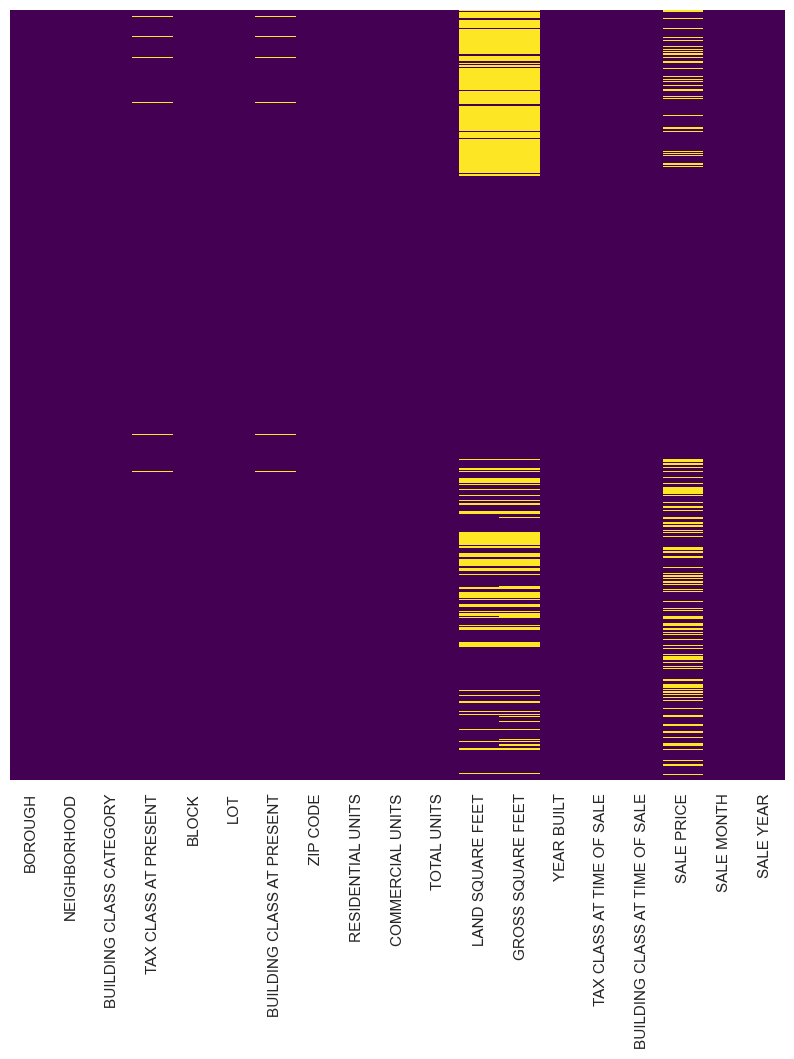

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

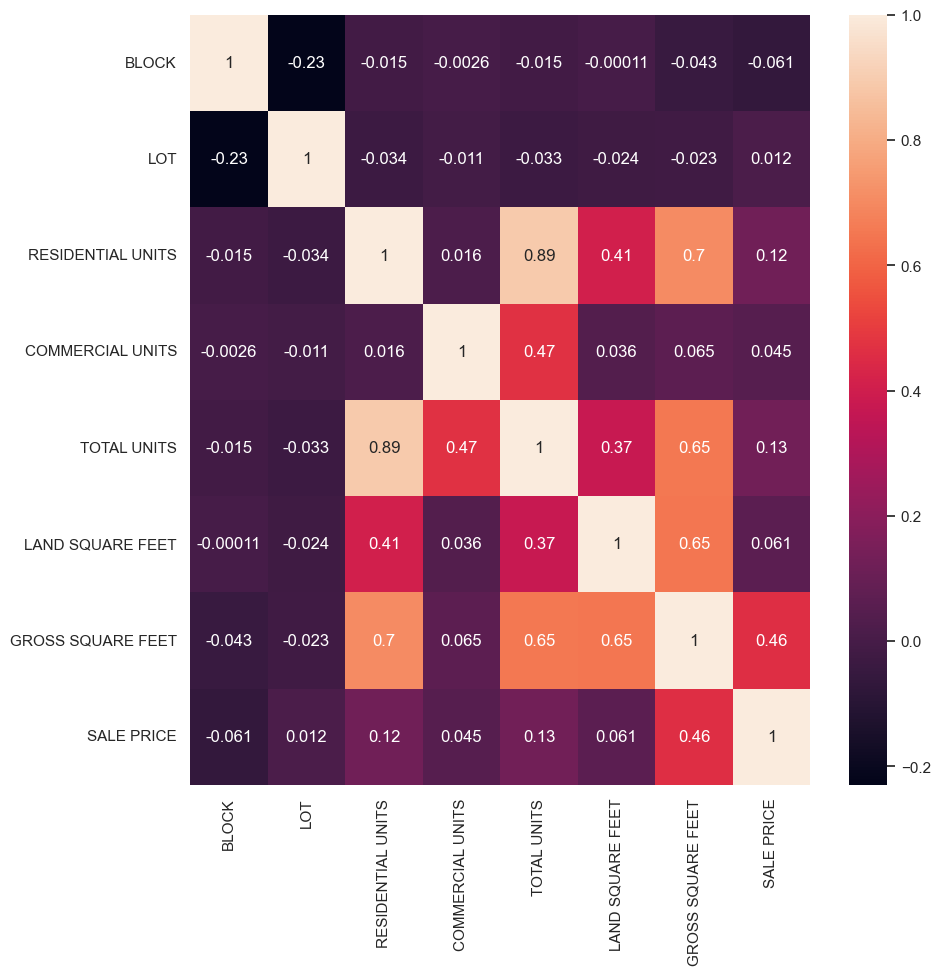

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Figure size 1200x500 with 0 Axes>

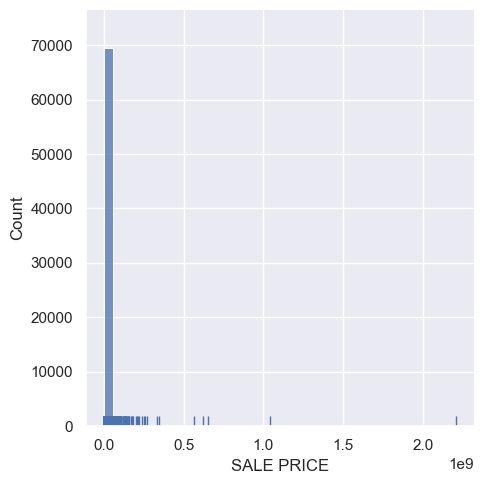

In [23]:
plt.figure(figsize=(12,5))
sns.displot(df['SALE PRICE'], bins=40, rug=True)
plt.show()

Ada banyak sekali sae pricel $0 di sini yang perlu dihapus karena tidak berguna untuk analisis

<Figure size 1200x500 with 0 Axes>

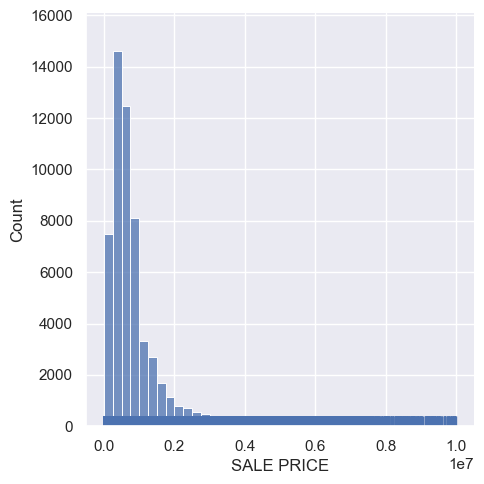

In [24]:
df2 = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 10000000)]

plt.figure(figsize=(12,5))
sns.displot(df2['SALE PRICE'], bins=40, rug=True)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19908\3921481126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LOG_PRICE'] = np.log(df2['SALE PRICE'])


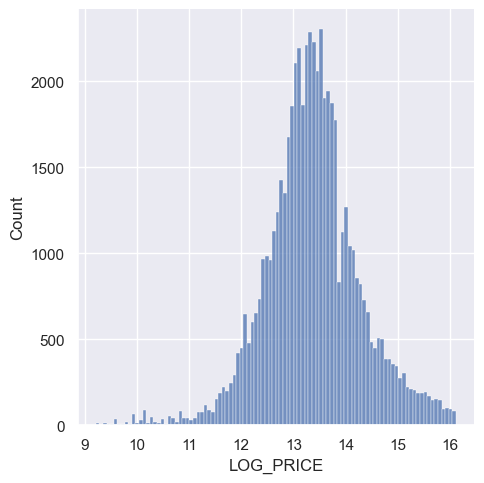

In [25]:
df2['LOG_PRICE'] = np.log(df2['SALE PRICE'])
sns.displot(df2['LOG_PRICE'], bins=100)

In [26]:
print(df2['LOG_PRICE'].skew())

-0.0766717364730912


Variable target jauh lebih normal

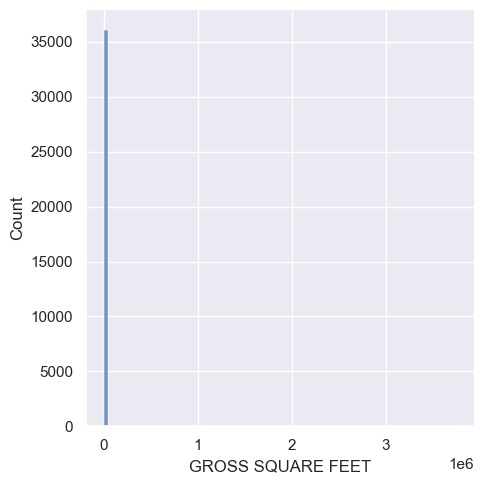

In [27]:
sns.displot(df2['GROSS SQUARE FEET'], bins=80)

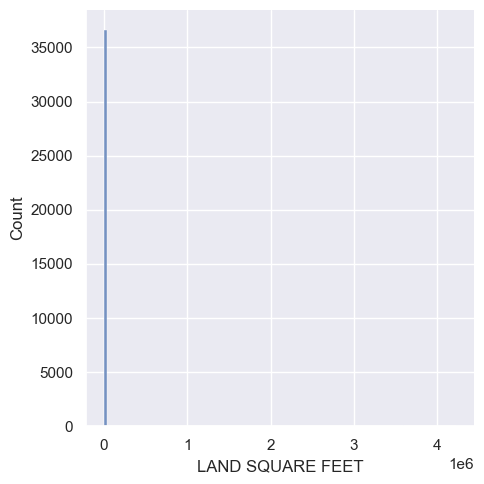

In [28]:
sns.displot(df2['LAND SQUARE FEET'], bins=100)

Ada banyak observasi ekstrim yang bisa dihilangkan untuk menormalkan data.

In [29]:
df3 = df2[(df2['GROSS SQUARE FEET'] < 8000) & (df2['LAND SQUARE FEET'] < 8000)]

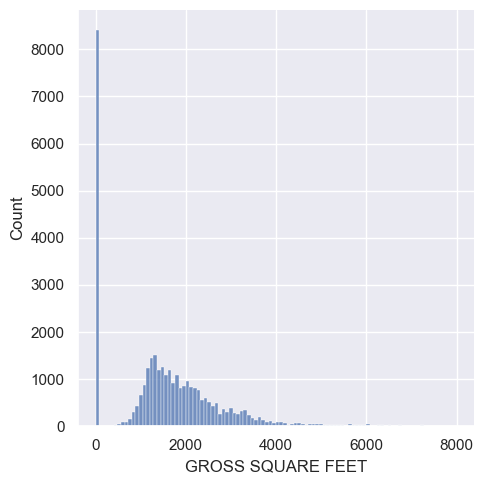

In [30]:
sns.displot(df3['GROSS SQUARE FEET'], bins=100)

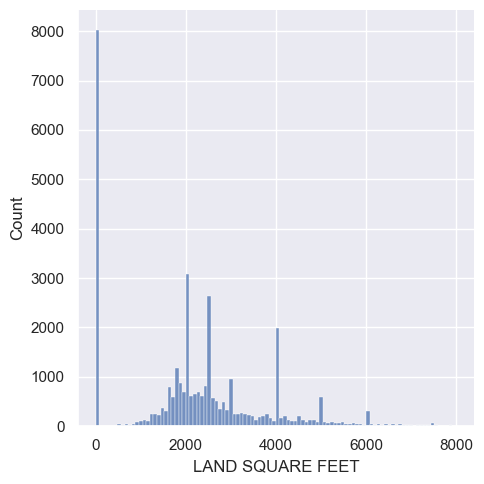

In [31]:
sns.displot(df3['LAND SQUARE FEET'], bins=100)

In [32]:
df3['YEAR BUILT'].value_counts()

1920    3369
1930    2698
1925    2555
1910    1740
0       1685
        ... 
1829       0
1826       0
1883       0
1680       0
1840       0
Name: YEAR BUILT, Length: 158, dtype: int64

Value 0 pada year built bisa dihilangkan karena tidak masuk akal

In [33]:
df4 = df3[df3['YEAR BUILT']!=0]

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YEAR BUILT', ylabel='Density'>

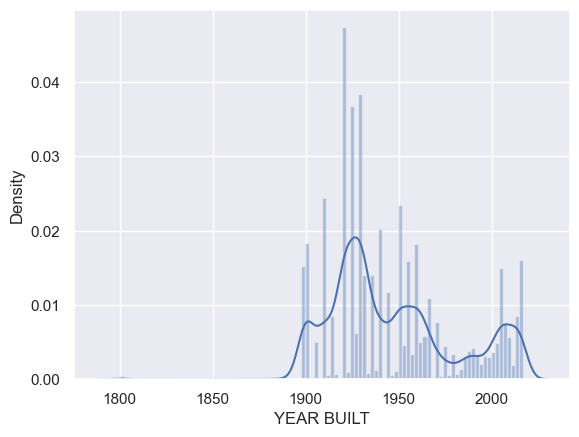

In [34]:
sns.distplot(df4['YEAR BUILT'], bins=100)

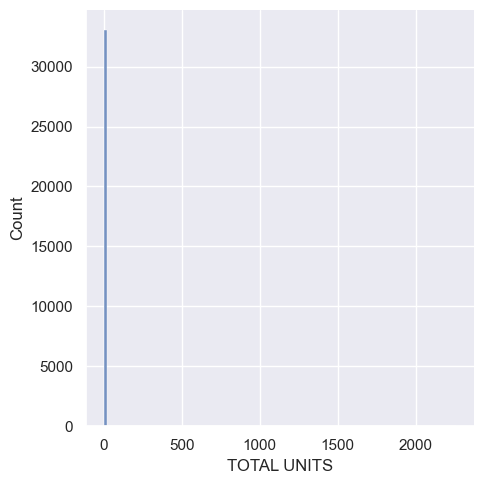

In [35]:
sns.displot(df4['TOTAL UNITS'], bins=100)

Di sini, terdapat banyak nilai 0 yang tidak masuk akal tetapi juga banyak nilai ekstrem 2261. Dengan jumlah nilai 2261 yang tidak normal ini, kita dapat berasumsi bahwa ini adalah nilai pengganti dan menghapusnya di samping nilai 0.

In [36]:
df5 = df4[(df4['TOTAL UNITS'] > 0) & (df4['TOTAL UNITS'] != 2261)]

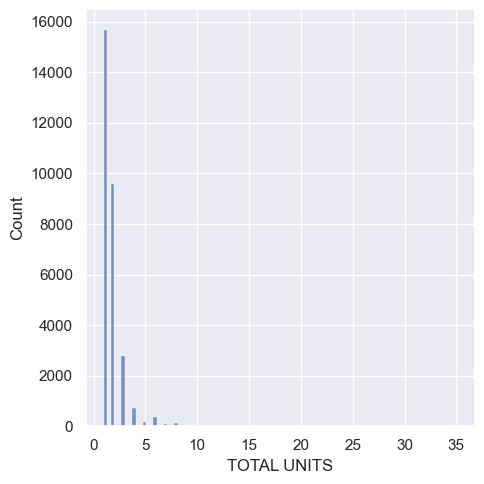

In [37]:
sns.displot(df5['TOTAL UNITS'], bins=100)

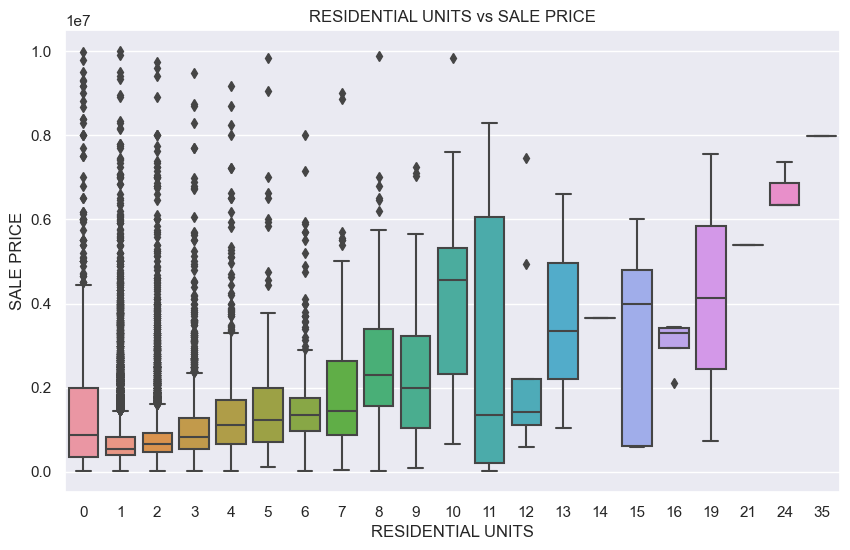

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=df5)
plt.title('RESIDENTIAL UNITS vs SALE PRICE')
plt.show()

Terdapat kenaikan harga jual secara linier seiring bertambahnya jumlah unit hunian hingga 10 dengan distribusi harga jual yang sangat bervariasi. Hal ini disebabkan kurangnya data untuk unit > 10.

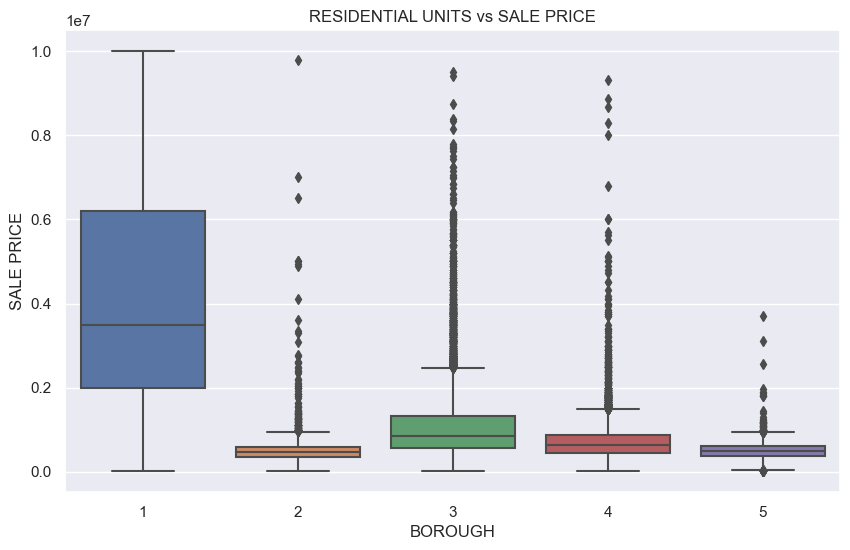

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df5)
plt.title('RESIDENTIAL UNITS vs SALE PRICE')
plt.show()

Dari angka tersebut terlihat sebaran harga jual yang jauh lebih luas di wilayah 1 dibandingkan dengan 4 wilayah lainnya. Sama seperti harga jual vs angka unit hunian, tidak banyak data untuk wilayah 1.